# Student Stress Factors



This dataset contains around 20 features that create the most impact on the Stress of a Student. The features are selected scientifically considering 5 major factors, they are Psychological, Physiological, Social, Environmental, and Academic Factors. Some of them are:

* Psychological Factors => 'anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
* Physiological Factors => 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem
* Environmental Factors => 'noise_level', 'living_conditions', 'safety', 'basic_needs',
* Academic Factors => 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns',
* Social Factor => 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying'

Source: https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis/data




## I. Get the Data

1. Load Libraries
2. Load the data
3. check the data, dimemssions, top 5 columns, type of data
4. Train test split

#### 1. Load Libraries

In [1]:
#load libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


#import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix


#models 

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.tree import DecisionTreeClassifier




#### 2. Load the data

In [2]:
stress_df = pd.read_csv("StressLevel.csv")

#### 3. check the data, dimemssions, top 5 columns, type of data

In [3]:
#check data 

#get dimensions of data 
print(f'Dimenssions of  data {stress_df.shape}') 


Dimenssions of  data (1100, 21)


In [4]:
#show top 5 rows of the dataset 
stress_df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [5]:
#show last 5 rows of the dataset 
stress_df.tail()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2
1099,18,6,1,15,3,3,0,3,3,0,...,3,3,4,3,3,1,5,1,4,2


In [6]:
stress_df.shape

(1100, 21)

In [7]:
#check data structure and missing values if any
stress_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

#### 4. Train test split

for this purpose our target variable will be stress_level

In [8]:
from sklearn.model_selection import train_test_split
#before continue checking our data we are going to split our data in traing a test
#we will continue working only with X_train

#select target variable
TARGET ='stress_level'

#define X as out entire df 
X = stress_df
# y as only our targe variable
y= stress_df[TARGET]

#during the phase of train and split we will choose a 10% of our data for test and will apply a stratification 
#allowing us to get well representation of the population we are working with
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y) #stratified sampling based on the target

#print the dimensions for each train and test 
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")


X_train.shape: (990, 21)
X_test.shape: (110, 21)
y_train.shape: (990,)
y_test.shape: (110,)


In [9]:
#create a copy of X_train and called it train_set
train_set = X_train.copy()

In [10]:
#check the dimensions
train_set.shape

(990, 21)

## II. Explore the Data
Here we pretend to get to understand the data better, for that we will follow the next steps:

1. Study Features (categorical,numerical, % missing values, noise data)
2. Visualize data 
3. Identify Target feature
4. Usefulness of data





#### 1. Study Features (categorical,numerical, % missing values, noise data)

In [11]:
#check if the categorical values, might be Nominal, Ordinal, or Binary (0,1 or yes,no)
train_set.apply(pd.unique)

anxiety_level                   [9, 3, 7, 15, 20, 16, 14, 12, 13, 6, 19, 10, 1...
self_esteem                     [18, 30, 25, 15, 0, 28, 17, 13, 1, 21, 20, 12,...
mental_health_history                                                      [0, 1]
depression                      [13, 2, 3, 6, 18, 7, 12, 17, 4, 10, 0, 24, 14,...
headache                                                       [2, 1, 5, 4, 3, 0]
blood_pressure                                                          [1, 2, 3]
sleep_quality                                                  [2, 5, 4, 3, 1, 0]
breathing_problem                                              [2, 5, 4, 1, 3, 0]
noise_level                                                    [2, 1, 3, 4, 5, 0]
living_conditions                                              [3, 4, 2, 5, 1, 0]
safety                                                         [2, 4, 5, 1, 3, 0]
basic_needs                                                    [2, 4, 3, 0, 1, 5]
academic_perform

here we can check that our target variable is 0, 1, 2 

0- low level of stress
1- medium level of stress
2- high level of stress

In [12]:
#let's check out how many of their observation are unique 
#identify categorical, numerical, binary values 
train_set.nunique()

anxiety_level                   22
self_esteem                     31
mental_health_history            2
depression                      28
headache                         6
blood_pressure                   3
sleep_quality                    6
breathing_problem                6
noise_level                      6
living_conditions                6
safety                           6
basic_needs                      6
academic_performance             6
study_load                       6
teacher_student_relationship     6
future_career_concerns           6
social_support                   4
peer_pressure                    6
extracurricular_activities       6
bullying                         6
stress_level                     3
dtype: int64

from this view, we could say that most of the features are ordinal because it can be ordered in a meaningful way for example:

- headache - goes from 0-5, which means 0 as non presence of headache and five very frequent 
The same applies for:
- blood_pressure
- sleep_quality
- breathing_problem

In [13]:
train_set.describe()
#check statistical values

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,11.000000,17.886869,0.485859,12.481818,2.492929,2.175758,2.656566,2.739394,2.642424,2.532323,...,2.780808,2.794949,2.606061,2.681818,2.635354,1.891919,2.721212,2.761616,2.606061,0.995960
std,6.150127,8.879108,0.500053,7.721464,1.401087,0.832491,1.542532,1.393602,1.321602,1.123544,...,1.440226,1.406102,1.308123,1.379018,1.525437,1.044721,1.418873,1.419830,1.523780,0.821835
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,2.500000,2.000000,2.500000,2.000000,3.000000,3.000000,...,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [14]:
train_set['headache'].value_counts()

headache
1    299
3    256
2    167
4    128
5    111
0     29
Name: count, dtype: int64

In [15]:
train_set['sleep_quality'].value_counts()


sleep_quality
1    291
4    174
2    172
5    168
3    153
0     32
Name: count, dtype: int64

In [16]:
train_set['bullying'].value_counts()

bullying
1    303
3    182
4    169
5    151
2    150
0     35
Name: count, dtype: int64

In [17]:
train_set['peer_pressure'].value_counts()

peer_pressure
2    321
1    163
5    158
3    157
4    157
0     34
Name: count, dtype: int64

In [18]:
train_set['study_load'].value_counts()

study_load
2    309
3    247
1    164
4    123
5    113
0     34
Name: count, dtype: int64

we can confirm features have a standard distribution, and we can certify it by creating a plot

#### 2. Visualize data

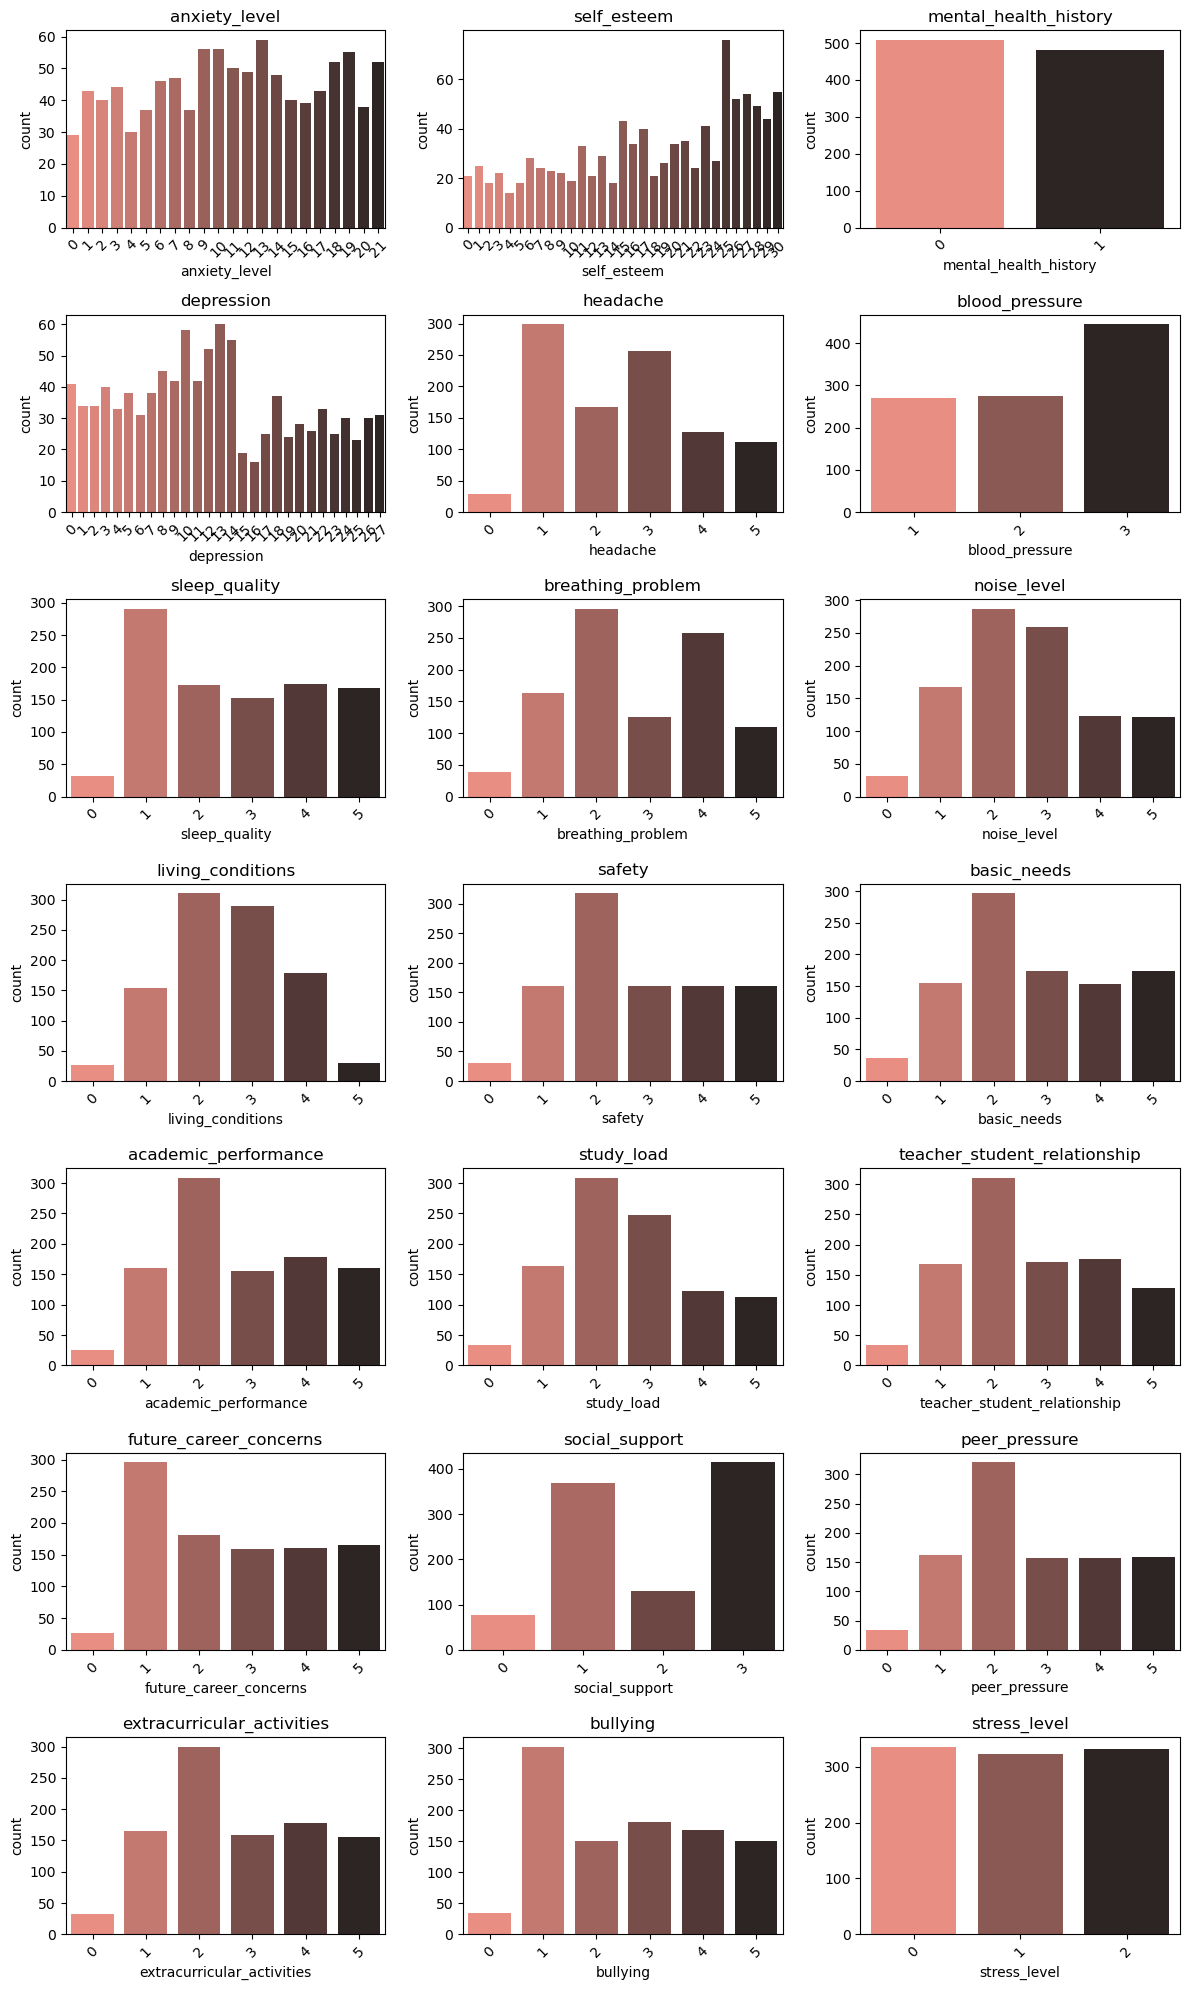

In [19]:
#Examing data distribution 

#create a bar chart for all colums
plt.figure(figsize=(12, 20)) 

#iterate to plot each feature
for i, column in enumerate(train_set.columns, 1):
    #create a subplot 
    plt.subplot(7, 3, i)
    #using seaborn we will create a countplot with a plalette color salmon
    sns.countplot(x=column, data=train_set, palette='dark:salmon_r')
    #rotate labels for better visualization
    plt.xticks(rotation=45)
    #add title
    plt.title(column)

 #tight graph   
plt.tight_layout()
#show
plt.show()

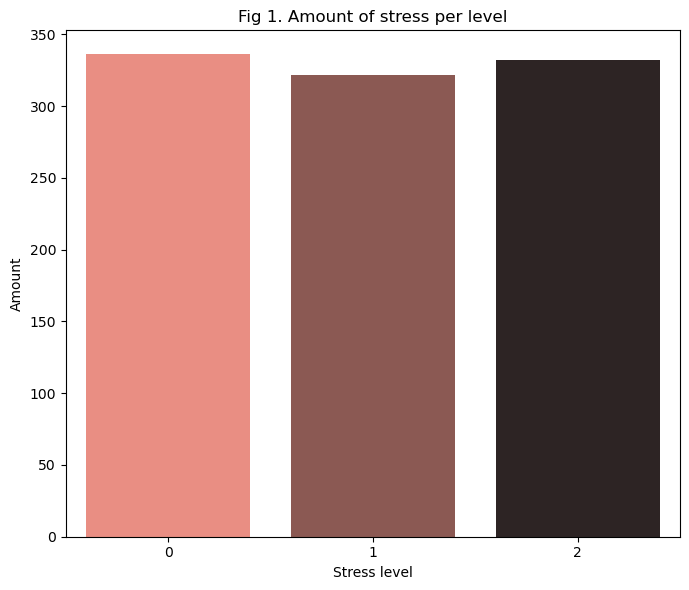

In [20]:
#show stress distribution by its own 


#select size
plt.figure(figsize=(7, 6))
#use seaborn to add data and columns
sns.countplot(data=train_set, x='stress_level', palette='dark:salmon_r')
#add title
plt.title('Fig 1. Amount of stress per level')
# add x label
plt.xlabel('Stress level')
# add y label
plt.ylabel('Amount')
#tight layout
plt.tight_layout()
#show layout
plt.show()

as we can agree, most of my feature follows a std, and our target variable stress_level seems to follow a pattern

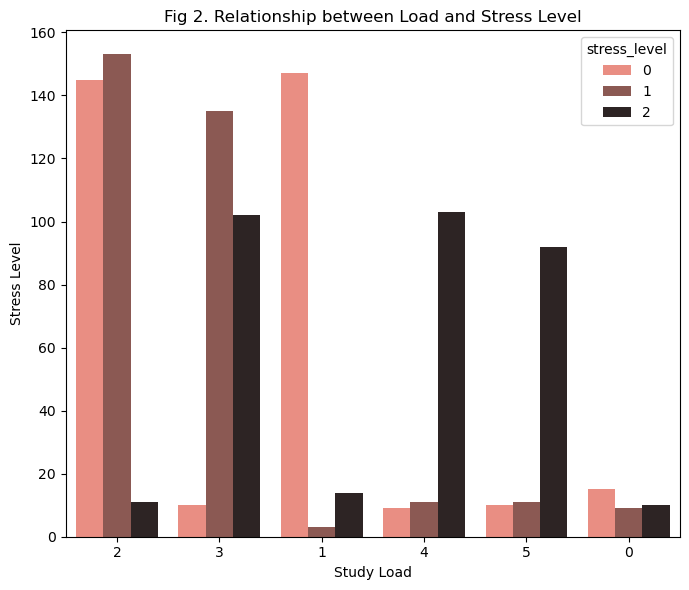

In [21]:
#check relation for stress level and study load 


#select size
plt.figure(figsize=(7, 6))
#use seaborn to add data and columns
sns.countplot(data=train_set, x='study_load', hue='stress_level', order=train_set['study_load'].value_counts().index, palette='dark:salmon_r' )
#add title
plt.title('Fig 2. Relationship between Load and Stress Level')
# add x label
plt.xlabel('Study Load')
# add y label
plt.ylabel('Stress Level')
#tight layout
plt.tight_layout()
#show layout
plt.show()

#as we can see as bigger the study load, bigger the level of stress

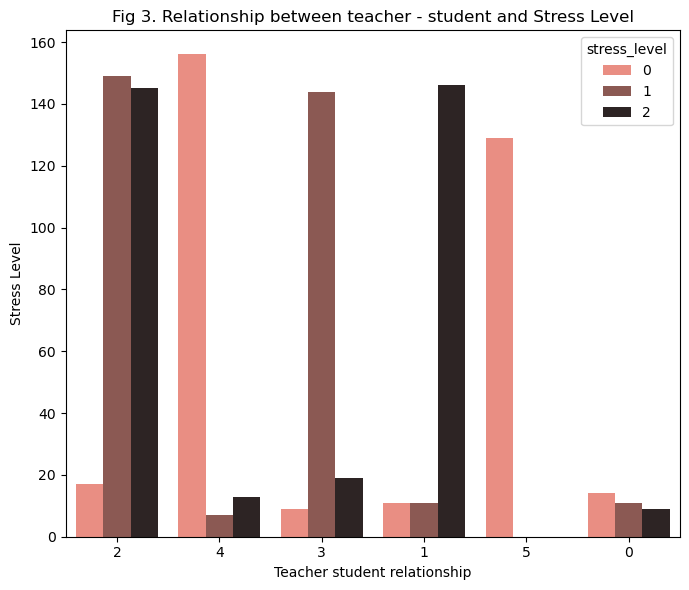

In [22]:
#check how the relationship with the professor is related to stress

#select size
plt.figure(figsize=(7, 6))
#use seaborn to add data and columns
sns.countplot(data=train_set, x='teacher_student_relationship', hue='stress_level', order=train_set['teacher_student_relationship'].value_counts().index, palette='dark:salmon_r' )
#add title
plt.title('Fig 3. Relationship between teacher - student and Stress Level')
# add x label
plt.xlabel('Teacher student relationship')
# add y label
plt.ylabel('Stress Level')
#tight layout
plt.tight_layout()
#show layout
plt.show()

#as we can see as great relationship with the professor less is the stress


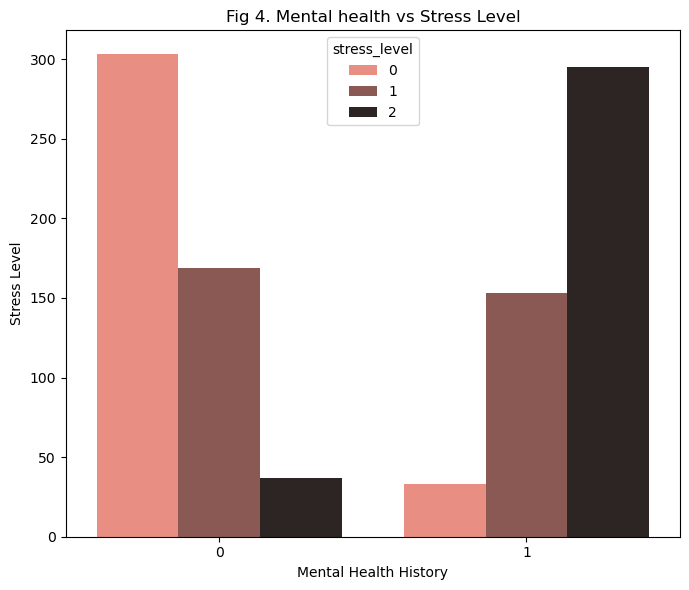

In [23]:
#check if any history of mental health can relate to stress


#select size
plt.figure(figsize=(7, 6))
#use seaborn to add data and columns
sns.countplot(data=train_set, x='mental_health_history', hue='stress_level', order=train_set['mental_health_history'].value_counts().index, palette='dark:salmon_r' )
#add title
plt.title('Fig 4. Mental health vs Stress Level')
# add x label
plt.xlabel('Mental Health History')
# add y label
plt.ylabel('Stress Level')
#tight layout
plt.tight_layout()
#show layout
plt.show()





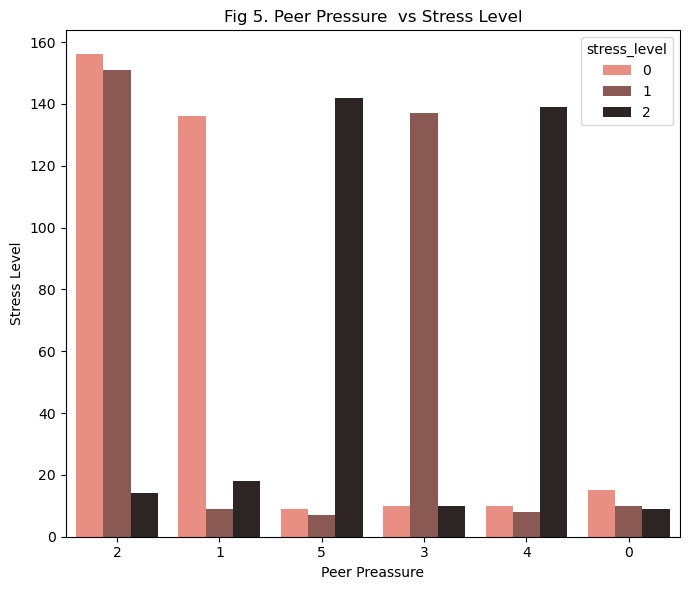

In [24]:
#check if the pressure of our team mates affect our stress level 

#select size
plt.figure(figsize=(7, 6))
#use seaborn to add data and columns
sns.countplot(data=train_set, x='peer_pressure', hue='stress_level', order=train_set['peer_pressure'].value_counts().index, palette='dark:salmon_r')
#add title
plt.title('Fig 5. Peer Pressure  vs Stress Level')
# add x label
plt.xlabel('Peer Preassure')
# add y label
plt.ylabel('Stress Level')
#tight layout
plt.tight_layout()
#show layout
plt.show()

#the preasure of teammates is directly impact our stress level


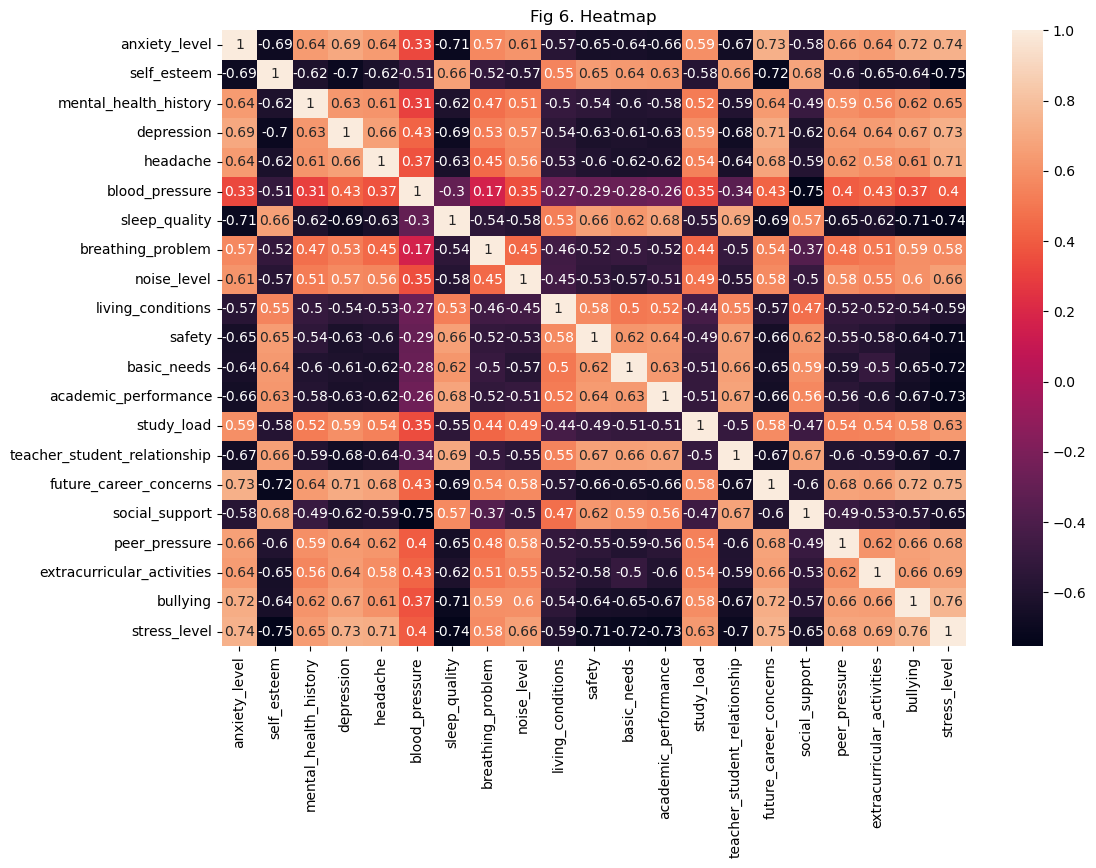

In [25]:


# Create heatmap with custom color palette
plt.figure(figsize=(12, 8))
sns.heatmap(train_set.corr() , annot=True, cmap='rocket')
plt.title('Fig 6. Heatmap')
plt.show()

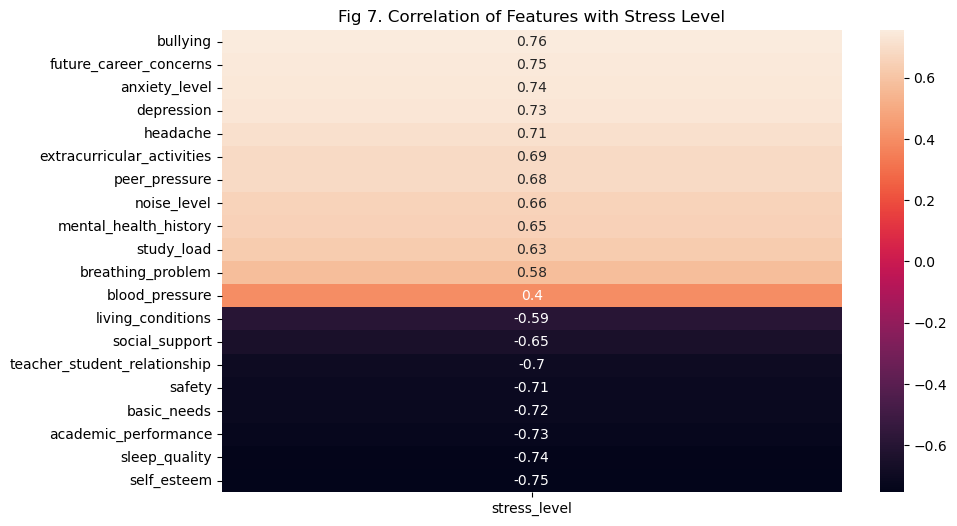

In [26]:
#show corr for stress level against other features
correlation = train_set.corr()
#organize values
correlation_stress = correlation['stress_level'].sort_values(ascending=False)
#remove stress leve to allow show the graph correctly 
correlation_stress = correlation_stress.drop('stress_level')
#size of the fig
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_stress.to_frame(), annot=True, cmap='rocket')
plt.title('Fig 7. Correlation of Features with Stress Level')
plt.show()

#### 3. Identify target feature


As we have seen in the exploratory analysis, all graphs were related to Stress level show meaningful and highly related information about how it helps to increase or reduce stress level, therefore our target variable that we will try to identify is stress level 

#### 4. Usefulness of data

The data provided show essential insights. Starting from the first, we utilized a headache analysis, showing the high level of students reporting a high frequency. We cannot discard any features since they are all important to the model.

### III. Prepare data 
1. Clean the data:
• Fix or remove outliers (optional).
• Fill in missing values (e.g., with zero, mean, median…) or drop their rows (or
columns).


2. Perform feature scaling:
• Standardize or normalize features.

#### 1. Clean data

In [27]:
#check missing values 
train_set.isnull().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

as we can see no missing values has been encounter 

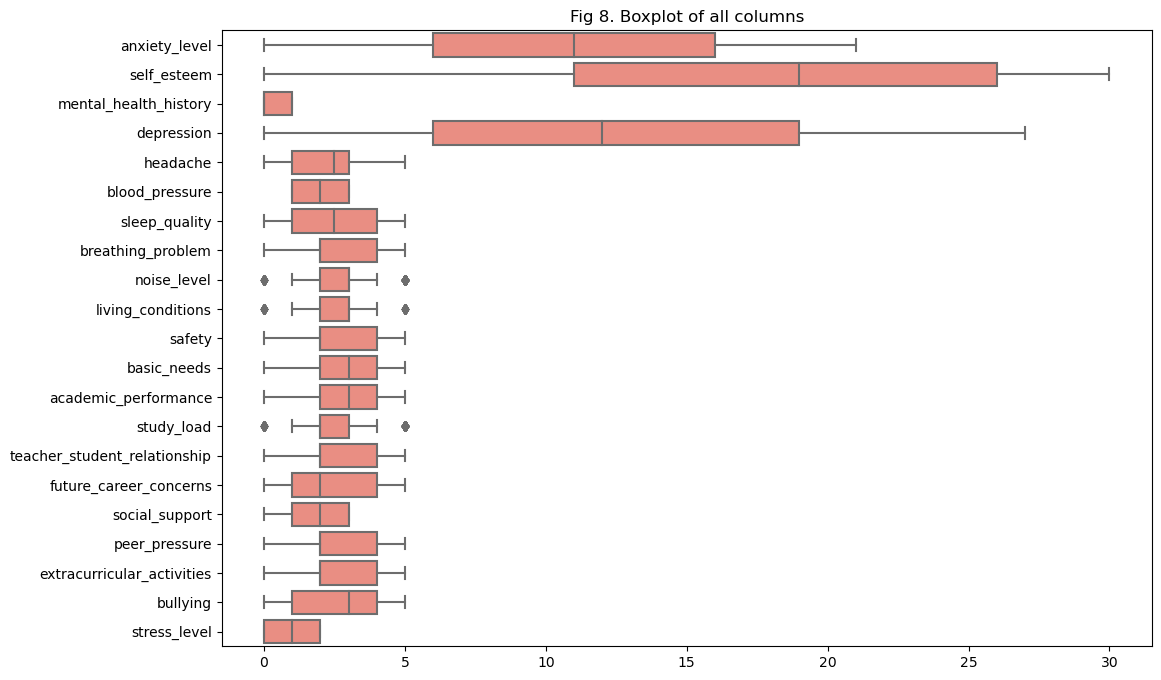

In [28]:
#check outliers 
plt.figure(figsize= (12,8))
sns.boxplot(data=train_set, orient='h', color='salmon')
plt.title('Fig 8. Boxplot of all columns')
plt.show()


as we can see the following feautres has outliers 
- noise_level
- living_conditions
- study_load

lets deal with them one by one 

In [29]:
train_set['noise_level'].value_counts()
#as we can see theres only 32 observations with values 0

noise_level
2    287
3    259
1    168
4    123
5    121
0     32
Name: count, dtype: int64

In [30]:
train_set['living_conditions'].value_counts()
#as we can see theres only 27 observations with values 0 and 29 with value 5

living_conditions
2    311
3    290
4    179
1    154
5     29
0     27
Name: count, dtype: int64

In [31]:
train_set['study_load'].value_counts()
#same happen for study load with only 34 observations in 0

study_load
2    309
3    247
1    164
4    123
5    113
0     34
Name: count, dtype: int64

In [32]:
#remove target variable from the dataset 

train_set.drop(columns=['stress_level'], inplace=True)
X_test.drop(columns=['stress_level'], inplace=True)

In [33]:
X_train = train_set

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 560 to 860
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 990 non-null    int64
 1   self_esteem                   990 non-null    int64
 2   mental_health_history         990 non-null    int64
 3   depression                    990 non-null    int64
 4   headache                      990 non-null    int64
 5   blood_pressure                990 non-null    int64
 6   sleep_quality                 990 non-null    int64
 7   breathing_problem             990 non-null    int64
 8   noise_level                   990 non-null    int64
 9   living_conditions             990 non-null    int64
 10  safety                        990 non-null    int64
 11  basic_needs                   990 non-null    int64
 12  academic_performance          990 non-null    int64
 13  study_load                    990 non-

#### 2. Perform feature scaling

In [35]:
#standarize the trian  data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_set)

In [36]:
X_train_scaled

array([[-0.32536089,  0.01274773, -0.97210605, ...,  0.19658479,
        -0.53668485,  0.25865846],
       [-1.30144356,  1.36491798, -0.97210605, ..., -0.5085563 ,
        -0.53668485, -1.05453062],
       [-0.65072178,  0.80151371, -0.97210605, ..., -1.21369738,
        -1.24135063, -1.05453062],
       ...,
       [-0.48804134,  1.36491798, -0.97210605, ..., -0.5085563 ,
        -1.24135063, -1.05453062],
       [ 1.62680445, -1.90282678,  1.02869435, ...,  0.90172587,
         0.87264671,  1.57184753],
       [-0.16268045, -0.32529483,  1.02869435, ..., -0.5085563 ,
         0.16798093, -0.39793608]])

In [37]:

#apply same steps for the test data 
X_test_scaled = scaler.fit_transform(X_test)

In [38]:
X_test_scaled

array([[ 1.27285506, -0.29514033,  0.89625816, ...,  1.45347093,
         0.84658672,  1.43466053],
       [ 1.61856879, -0.50664154,  0.89625816, ...,  0.77600567,
         0.84658672,  0.80592484],
       [ 0.75428448, -0.61239215,  0.89625816, ...,  1.45347093,
         1.56292933,  1.43466053],
       ...,
       [ 0.06285704,  0.65661513,  0.89625816, ..., -0.57892486,
         0.13024411,  0.17718915],
       [ 0.2357139 ,  0.44511392,  0.89625816, ..., -0.57892486,
        -0.5860985 , -0.45154654],
       [ 0.92714134, -0.18938972,  0.89625816, ...,  0.77600567,
         0.84658672,  0.80592484]])

In [39]:
#print the dimensions for each train and test 
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

#show scaled xtrain and test shape
print(f"X_train_scaled.shape: {X_train_scaled.shape}")
print(f"X_test_scaled.shape: {X_test_scaled.shape}")

X_train.shape: (990, 20)
X_test.shape: (110, 20)
y_train.shape: (990,)
y_test.shape: (110,)
X_train_scaled.shape: (990, 20)
X_test_scaled.shape: (110, 20)


### IV. Select best ML models

1. Perform feature selection (optional):  Drop the attributes that provide no useful information for the task.
2. Identify  models to apply 
3. Show feature importance for each model 
4. Show metrics for each model Precision, Recall, Accuracy, AUC, F1 Score

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#we are using Select K best with f_classif to identify our best features 
selector = SelectKBest(score_func=f_classif, k='all')  

# Fit the selector to your data
selector.fit(X_train, y_train)

# Get the scores and p-values of the features
#score of the feature 
scores = selector.scores_

#significance of the feature 
p_values = selector.pvalues_


#print the features and scores and p-values 
for feature, score, p_value in zip(X_train.columns, scores, p_values):
    print(f"Feature: {feature}, Score: {score}, P-value: {p_value}")


Feature: anxiety_level, Score: 596.5722800311929, P-value: 1.4224056038881554e-170
Feature: self_esteem, Score: 689.4959862472582, P-value: 4.1683836327462383e-188
Feature: mental_health_history, Score: 360.32946962958096, P-value: 3.2029803071746514e-118
Feature: depression, Score: 579.5195918244895, P-value: 3.406715734772355e-167
Feature: headache, Score: 511.3181570722145, P-value: 4.046163983858229e-153
Feature: blood_pressure, Score: 1028.4592722360844, P-value: 4.18134754705178e-242
Feature: sleep_quality, Score: 616.894128151987, P-value: 1.5639945391850752e-174
Feature: breathing_problem, Score: 253.6100868816806, P-value: 1.3240729385832978e-89
Feature: noise_level, Score: 385.2653698901923, P-value: 2.167300000240726e-124
Feature: living_conditions, Score: 267.11507181286885, P-value: 1.9156695206240373e-93
Feature: safety, Score: 543.0501281169841, P-value: 8.777971566895891e-160
Feature: basic_needs, Score: 568.5840206216494, P-value: 5.343271855165385e-165
Feature: academ

so far blood pressure is the best feature 

Feature: blood_pressure, Score: 1028.4592722360844, P-value: 4.18134754705178e-242

but it's p-value is not the best as compare to peer_pressure or safety
- Feature: peer_pressure, Score: 469.10700227063234, P-value: 6.38443285713036e-144
- Feature: safety, Score: 543.0501281169841, P-value: 8.777971566895891e-160


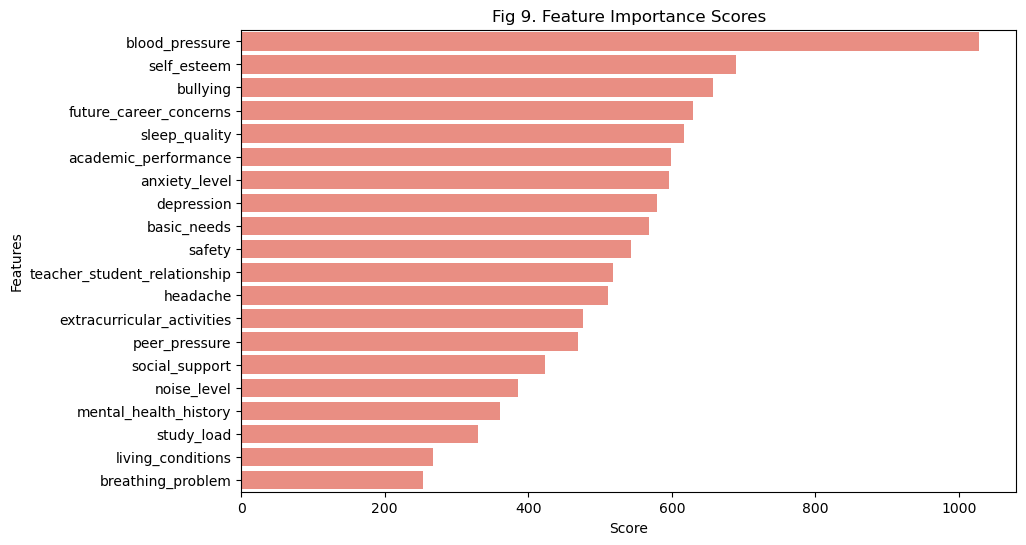

In [41]:

# Sort the scores and get the indices of the features in descending order
sorted_indices = np.argsort(scores)[::-1] 
sorted_scores = scores[sorted_indices]  

# Plot with a size of 10,6
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_scores, y=X_train.columns[sorted_indices], color='salmon')  # Plotting with sorted indices
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Fig 9. Feature Importance Scores')
plt.show()



####  2. Identify  models to apply 

In [42]:
def get_metrics(actual, prediction):
    
    # Measure Accurracy
    accuracy = accuracy_score(actual, prediction)

    # Measure precision
    precision = precision_score(actual, prediction, average='micro')


    # Measure recall
    recall = recall_score(actual, prediction, average='micro')

    # Measure AUC
#     auc = roc_auc_score(actual, prediction)

    # Measure F1 score
    f1 = f1_score(actual, prediction, average='micro')

    print('Accuracy: %.2f' % (accuracy*100))
    print('Precision: %.2f' % (precision*100))
    print('Recall: %.2f' % (recall*100))
#     print('AUC: %.2f' % (auc*100))
    print('F1: %.2f' % (f1*100))
    
    return 

#### Logistic Regression 

In [52]:

#fit the model
log_reg = LogisticRegression(solver='lbfgs')

#send X_Train_fs that already has the best feature selected and our target
log_reg.fit(X_train_scaled, y_train)

# evaluate the model
log_reg_pred = log_reg.predict(X_test)


/Users/raemilcorniel/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [53]:
log_reg_pred = log_reg.predict(X_test)


/Users/raemilcorniel/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [54]:
 fd = log_reg.score(X_test)

TypeError: ClassifierMixin.score() missing 1 required positional argument: 'y'

In [654]:

#show the classification results 
print('Show classification report \n',classification_report(y_test, log_reg_pred))

Show classification report 
               precision    recall  f1-score   support

           0       0.51      1.00      0.68        37
           1       0.00      0.00      0.00        36
           2       0.92      0.95      0.93        37

    accuracy                           0.65       110
   macro avg       0.48      0.65      0.54       110
weighted avg       0.48      0.65      0.54       110



/Users/raemilcorniel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raemilcorniel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raemilcorniel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [655]:
#print the confusion matrix to show the actual vs predcited
print('Confusion matrix')
confusion_matrix(y_test, log_reg_pred)

Confusion matrix


array([[37,  0,  0],
       [33,  0,  3],
       [ 2,  0, 35]])

In [656]:
#get metrics results 
get_metrics(y_test, log_reg_pred)

Accuracy: 65.45
Precision: 65.45
Recall: 65.45
F1: 65.45


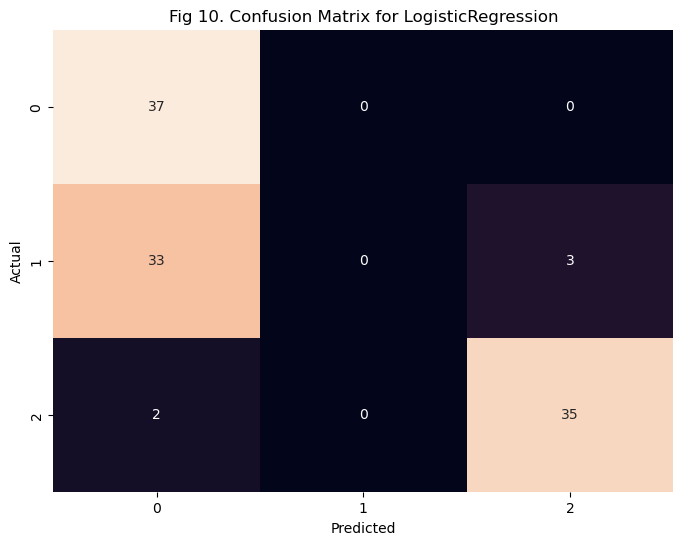

In [750]:


# show the conf matrix in a graph 
conf_matrix = confusion_matrix(y_test, log_reg_pred)

# use a heat map 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='rocket', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Fig 10. Confusion Matrix for LogisticRegression')
plt.show()


#### RandomForestClassifier

In [751]:
#Random Forest
random_forest = RandomForestClassifier(random_state=42)
#fit the model
random_forest.fit(X_train_scaled, y_train)
#predict values 
random_forest_pred = random_forest.predict(X_test)

#show the classification results 
print('Show classification report \n',classification_report(y_test, random_forest_pred))

Show classification report 
               precision    recall  f1-score   support

           0       0.35      1.00      0.51        37
           1       0.50      0.03      0.05        36
           2       1.00      0.03      0.05        37

    accuracy                           0.35       110
   macro avg       0.62      0.35      0.21       110
weighted avg       0.62      0.35      0.21       110



/Users/raemilcorniel/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [752]:
#get confusion metrics 
print('Confusion matrix')
confusion_matrix(y_test, random_forest_pred)

Confusion matrix


array([[37,  0,  0],
       [35,  1,  0],
       [35,  1,  1]])

In [753]:
#get metrics results 
get_metrics(y_test, random_forest_pred)

Accuracy: 35.45
Precision: 35.45
Recall: 35.45
F1: 35.45


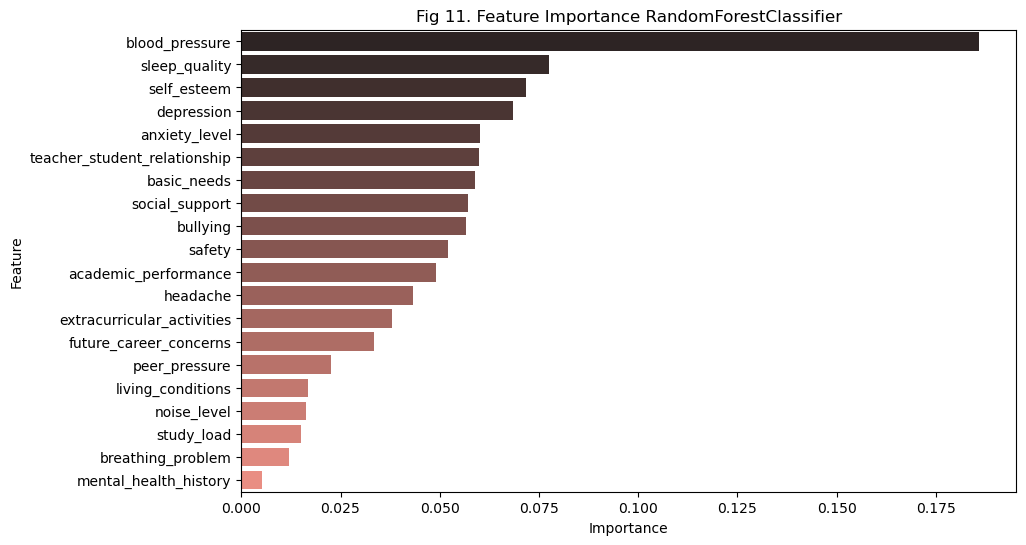

In [754]:
# Plot feature importance for the randon forest results 
feature_importances = random_forest.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[indices], y=train_set.columns[indices], palette='dark:salmon')
plt.title('Fig 11. Feature Importance RandomForestClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
plt.show()

apply hyperparametters to randon forest

In [755]:

# Define hyperparametters RandomizedSearchCV
param_dist = {
#     'n_estimators': randint(10, 200),
#     'max_features': uniform(0.1, 0.4),  
#     'max_depth': randint(2, 20),
#     'min_samples_split': uniform(0.1, 0.4),  
#     'min_samples_leaf': uniform(0.1, 0.4),  
#     'max_leaf_nodes': randint(2, 100),
#     'oob_score': [True, False]
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# pass parameter to RandomizedSearchCV
random_forest_search = RandomizedSearchCV(
    random_forest, param_distributions=param_dist, cv=4, scoring='roc_auc', refit=True, n_jobs=-1, verbose=2
)

# Fit the RandomizedSearchCV
random_forest_search.fit(X_train, y_train)

# Get the best parameters and best estimator
forest_best_params = random_forest_search.best_params_
forest_best_estimator = random_forest_search.best_estimator_

print(forest_best_params)
print(f"Best stimator:", forest_best_estimator)




Fitting 4 folds for each of 10 candidates, totalling 40 fits


/Users/raemilcorniel/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raemilcorniel/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/raemilcorniel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/raemilcorniel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

/Users/raemilcorniel/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raemilcorniel/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/raemilcorniel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/raemilcorniel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
Best stimator: RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=50,
                       random_state=42)


In [756]:
#predict 
random_for_pred = forest_best_estimator.predict(X_test)


#show the classification results 
print('Show classification report \n',classification_report(y_test, random_for_pred))


Show classification report 
               precision    recall  f1-score   support

           0       0.94      0.78      0.85        37
           1       0.88      0.83      0.86        36
           2       0.80      0.97      0.88        37

    accuracy                           0.86       110
   macro avg       0.87      0.86      0.86       110
weighted avg       0.87      0.86      0.86       110



In [757]:
#get confusion metrics 
print('Confusion matrix')
confusion_matrix(y_test, random_for_pred)

Confusion matrix


array([[29,  4,  4],
       [ 1, 30,  5],
       [ 1,  0, 36]])

In [758]:
#get metrics results 
get_metrics(y_test, random_for_pred)

Accuracy: 86.36
Precision: 86.36
Recall: 86.36
F1: 86.36


In [759]:
#show feature importance 

for name, score in sorted(zip(X_train.columns, forest_best_estimator.feature_importances_), key=lambda x: x[1],reverse=True):
    print(name, score)

blood_pressure 0.17681465667792864
sleep_quality 0.10666309505802539
basic_needs 0.08462613273588677
self_esteem 0.08130949316404877
anxiety_level 0.06785524513959523
depression 0.059112717401287825
teacher_student_relationship 0.05844227965347325
social_support 0.055637753494864856
academic_performance 0.044741565198846346
bullying 0.043464582445631186
safety 0.04266183469168569
extracurricular_activities 0.039321575233221745
headache 0.03554258441941538
peer_pressure 0.030259788781828154
future_career_concerns 0.025083292337898192
noise_level 0.015576064320767389
study_load 0.010665333312956509
living_conditions 0.01010743114790822
breathing_problem 0.008957331732526125
mental_health_history 0.0031572430522043625


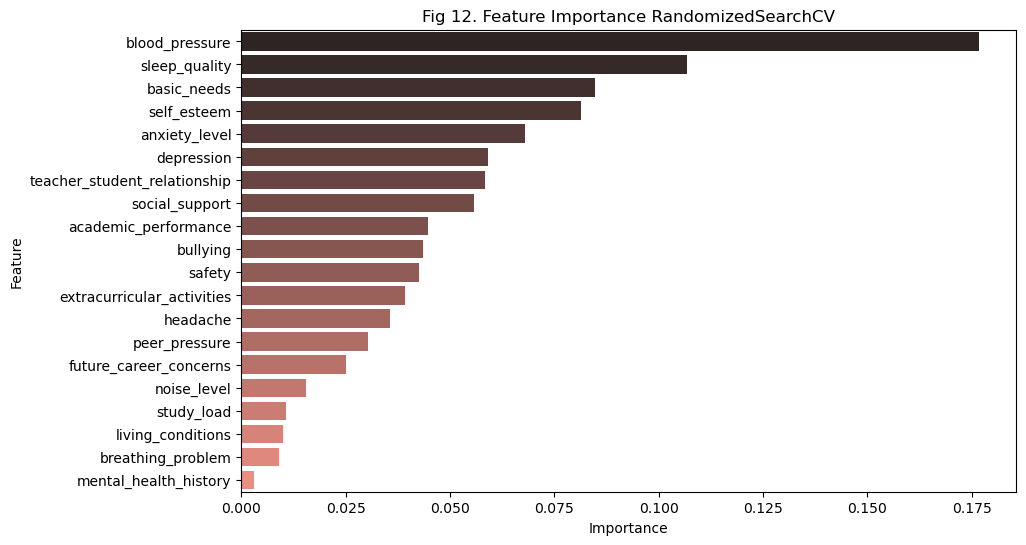

In [760]:

# Get feature importances
importances = forest_best_estimator.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importance and names
sorted_features = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Extract sorted feature names and importances
sorted_rf_names = [name for name, _ in sorted_features]
sorted_rf_scores = [score for _, score in sorted_features]

# create a df for this plot 
feature_importance_df = pd.DataFrame({'Feature': sorted_rf_names, 'Importance': sorted_rf_scores})

# Plot feature importances using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='dark:salmon')
#add labels 
plt.title('Fig 12. Feature Importance RandomizedSearchCV')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



#### DecisionTreeClassifier

In [761]:
#init my model desicion tre
decision_tree = DecisionTreeClassifier(random_state=42)
#fit. the model 
decision_tree.fit(X_train, y_train)
#get the predictions 
descion_tree_pred = decision_tree.predict(X_test)


In [762]:
#show the classification results 
print('Show classification report \n',classification_report(y_test, descion_tree_pred))


Show classification report 
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        37
           1       0.88      0.83      0.86        36
           2       0.90      0.97      0.94        37

    accuracy                           0.89       110
   macro avg       0.89      0.89      0.89       110
weighted avg       0.89      0.89      0.89       110



In [763]:
#get confusion metrics 
print('Confusion matrix')
confusion_matrix(y_test, random_for_pred)

Confusion matrix


array([[29,  4,  4],
       [ 1, 30,  5],
       [ 1,  0, 36]])

In [764]:
#get metrics results 
get_metrics(y_test, random_for_pred)

Accuracy: 86.36
Precision: 86.36
Recall: 86.36
F1: 86.36


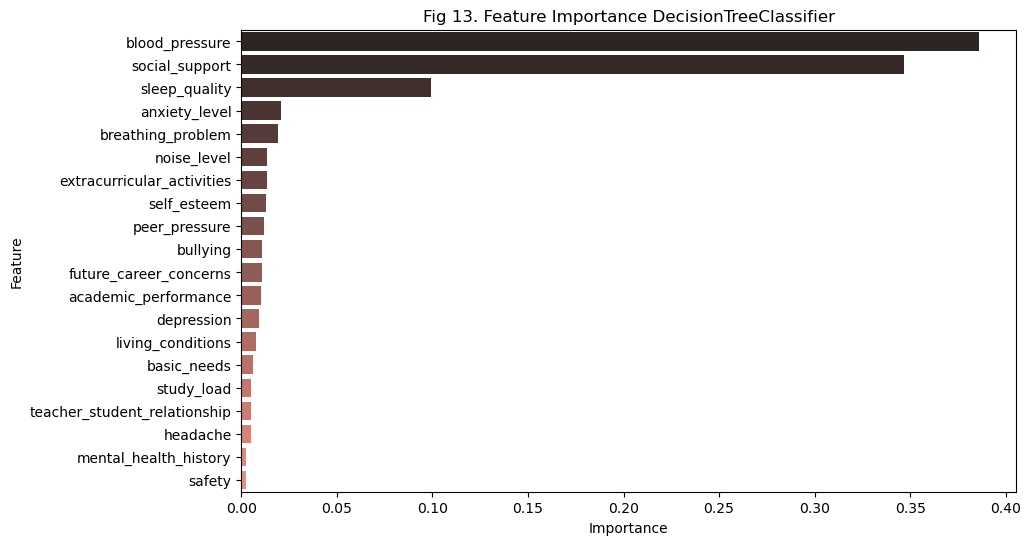

In [765]:
# Get feature importances
importances = decision_tree.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances and feature names together
sorted_features = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# extract name
sorted_dt_names = [name for name, _ in sorted_features]
sorted_dt_scores = [score for _, score in sorted_features]

# Create a df for this plot
feature_importance_df = pd.DataFrame({'Feature': sorted_dt_names, 'Importance': sorted_dt_scores})

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='dark:salmon')
#add labels 
plt.title('Fig 13. Feature Importance DecisionTreeClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


### Semi supervised model 

In [766]:
#import librarys 
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import accuracy_score
from numpy import concatenate


In [767]:

#select target variable
TARGET ='stress_level'

#define X as out entire df 
X = stress_df
# y as only our targe variable
y= stress_df[TARGET]



In [768]:
#drop the target variable from the train
X = X.drop(columns=[TARGET])

In [769]:

# split data into labeled and unlabeled
#we will take a 1% of the data for this model, and will divide the dataset equally using stratification 
X_train_label, X_test_unlabel, y_train_label, y_test_unlabel = train_test_split(X, y, test_size=0.1, stratify=y)


#print the dimensions for each train and test 
print(f"X_train_label.shape: {X_train_label.shape}")
print(f"X_test_unlabel.shape: {X_test_unlabel.shape}")
print(f"y_train_label.shape: {y_train_label.shape}")
print(f"y_test_unlabel.shape: {y_test_unlabel.shape}")

X_train_label.shape: (990, 20)
X_test_unlabel.shape: (110, 20)
y_train_label.shape: (990,)
y_test_unlabel.shape: (110,)


In [770]:

#apply same steps for the test data 
scaler = StandardScaler()
X_train_label_scaled = scaler.fit_transform(X_train_label)
X_test_unlabel_scaled = scaler.fit_transform(X_test_unlabel)

In [771]:
#for the semi- supervised  learning we need to merge test and train 
X_train_mixed = concatenate((X_train_label_scaled, X_test_unlabel_scaled))

In [772]:
#to identify the label that the semi-supervised model need to change we put them as -1
unlabeled = [-1 for _ in range(len(y_test_unlabel))]

In [773]:
#join the test and train y dataset
y_train_mixed = concatenate((y_train_label, unlabeled))

In [774]:
#show -1 labels 
y_train_mixed

array([ 2,  1,  2, ..., -1, -1, -1])

In [775]:
#define the model, for this case we will use label propagation 
label_prog = LabelPropagation()
# fit model on training dataset
label_prog.fit(X_train_mixed, y_train_mixed)

LabelPropagation()

In [776]:
# predict
label_prop_pred = label_prog.predict(X_test_unlabel_scaled)
# calculate score for the y_test
score = accuracy_score(y_test, label_prop_pred)
# show accurracy 
print('Accuracy: %.3f' % (score*100))

Accuracy: 33.636


In [777]:
# get all the the unlabeled data already labeled
tran_labels = label_prog.transduction_

In [778]:
#sneak peak
tran_labels

array([2, 1, 2, ..., 1, 0, 1])

In [779]:
# for test our solution we will use log regresion 
log_reg = LogisticRegression()
# fit the model with the discovere labels 
log_reg.fit(X_train_mixed, tran_labels)
# make the prediction on x test scaled 
log_reg_pred = log_reg.predict(X_test_unlabel_scaled)


In [780]:
# calculate score for test set
score = accuracy_score(y_test, log_reg_pred)
# summarize score
print('Accuracy: %.3f' % (score*100))

Accuracy: 33.636


In [781]:

#show the classification results 
print('Show classification report \n',classification_report(y_test, log_reg_pred))

Show classification report 
               precision    recall  f1-score   support

           0       0.33      0.32      0.33        37
           1       0.28      0.28      0.28        36
           2       0.39      0.41      0.40        37

    accuracy                           0.34       110
   macro avg       0.34      0.34      0.34       110
weighted avg       0.34      0.34      0.34       110



In [782]:
#print the confusion matrix to show the actual vs predcited
print('Confusion matrix')
confusion_matrix(y_test, log_reg_pred)

Confusion matrix


array([[12, 14, 11],
       [14, 10, 12],
       [10, 12, 15]])

In [783]:
#get metrics results 
get_metrics(y_test, log_reg_pred)

Accuracy: 33.64
Precision: 33.64
Recall: 33.64
F1: 33.64


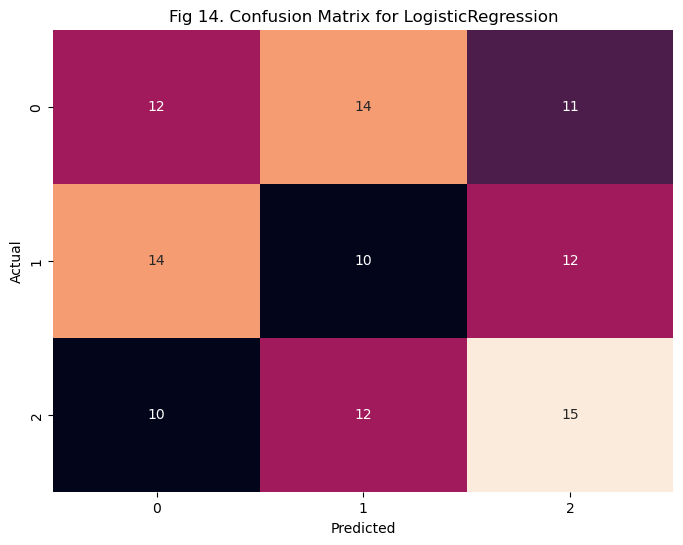

In [784]:

# show the conf matrix in a graph 
conf_matrix = confusion_matrix(y_test, log_reg_pred)

# use a heat map 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='rocket', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Fig 14. Confusion Matrix for LogisticRegression')
plt.show()